In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
import yfinance as yf
start='2012-01-01'
end='2023-11-15'

stock='GOOG'

df=yf.download(stock,start,end)
df.reset_index(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449757,16.517494,16.127391,16.141484,147611217
1,2012-01-04,16.520702,16.569404,16.331338,16.440359,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387978,15.994637,15.357570,15.982275,233776981
...,...,...,...,...,...,...
2982,2023-11-08,132.267975,132.545889,131.176173,131.374681,15093600
2983,2023-11-09,130.709671,132.962777,130.531003,132.367237,17976500
2984,2023-11-10,133.062012,133.270455,129.895757,130.550847,20872900


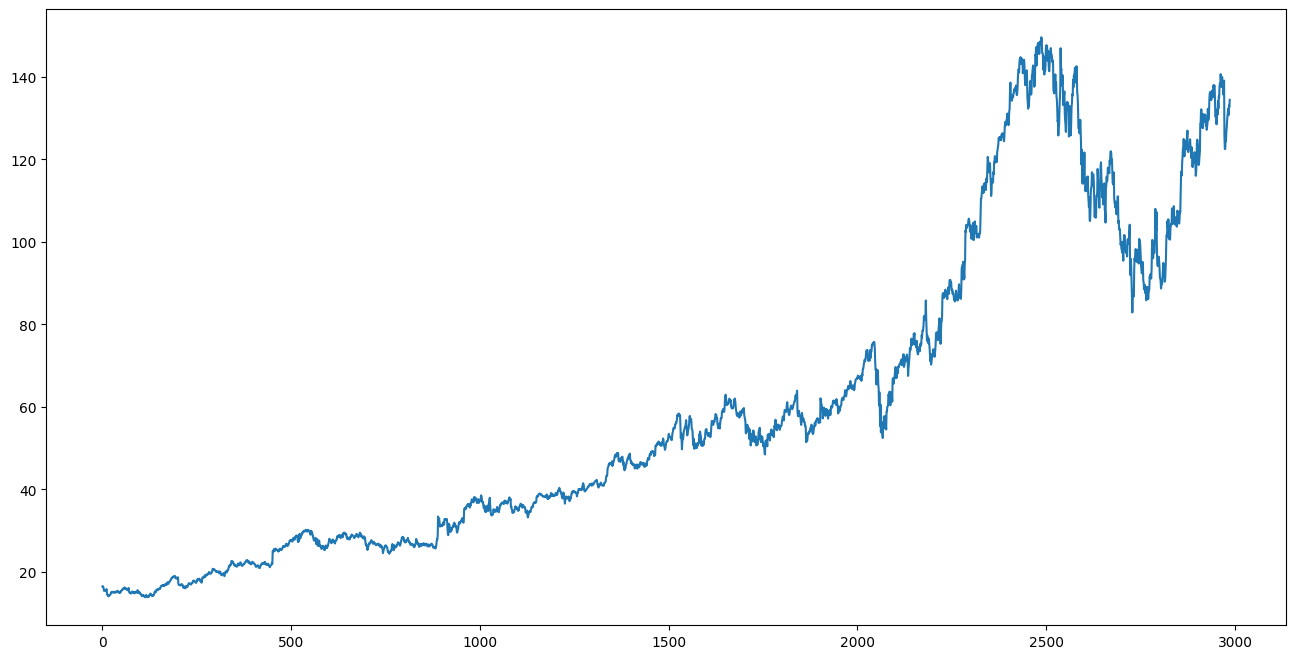

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'Closing Price')

Classification problem : Buy (+1) or sell (-1) the stock

In [5]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

Input Festures to Predict wheather customer should Buy or Sell the Stock.

In [6]:
X = df[['Open - Close', 'High - Low']]
X.head()

Price,Open - Close,High - Low
Ticker,,
0,-0.308273,0.390102
1,-0.080343,0.238065
2,0.077131,0.191343
3,0.225703,0.252404
4,0.594298,0.637068


Intention is to share +1 for buy signal and -1 for the sell signal. The target Varialble is "Y"for the classification test.

In [7]:
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1).flatten()

In [8]:
Y

array([ 1, -1, -1, ..., -1,  1, -1], shape=(2987,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

Implementation KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using  gridsearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.66
Test_data Accuracy: 0.49


In [11]:
predictions_classification = model.predict(X_test)

In [12]:
# Creating a dataframe with the actual and predicted classes.
actual_predicted_data = pd.DataFrame({'Actual Class': y_test.flatten(), 'Predicted Class':predictions_classification.flatten()})

In [13]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,1
1,1,1
2,-1,-1
3,1,-1
4,-1,1
5,-1,-1
6,1,1
7,1,-1
8,1,1
9,1,-1


Regression Problem : KNN

In [14]:
y = df['Close']

In [15]:
y

Ticker,GOOG
0,16.449757
1,16.520702
2,16.291536
3,16.069296
4,15.387978
...,...
2982,132.267975
2983,130.709671
2984,133.062012
2985,132.645126


Implementation of KNN Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

#using GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make the predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [17]:
print(predictions)

[[ 95.80874116]
 [ 28.19907284]
 [ 29.52638245]
 [ 42.41101851]
 [ 22.98366465]
 [118.73851449]
 [ 39.60348129]
 [ 98.62036678]
 [ 77.08059856]
 [ 19.33055489]
 [ 78.25876154]
 [ 21.55224371]
 [ 96.763437  ]
 [ 33.04660225]
 [ 44.52052607]
 [ 40.03755815]
 [ 89.74114186]
 [ 26.4634804 ]
 [ 82.54365785]
 [ 29.96470615]
 [ 20.49106298]
 [ 26.84222882]
 [103.52919224]
 [ 26.54463318]
 [ 70.0181036 ]
 [ 86.59775352]
 [ 41.42538466]
 [ 34.61073794]
 [ 22.36650276]
 [106.2824707 ]
 [ 43.01961422]
 [ 46.80408641]
 [ 31.3679625 ]
 [ 30.2110268 ]
 [ 45.89849281]
 [ 52.70512881]
 [ 21.296997  ]
 [ 26.64678035]
 [115.49009105]
 [ 19.52749763]
 [ 29.17286955]
 [113.41997555]
 [ 28.25094659]
 [102.92717198]
 [ 19.39540386]
 [109.80923789]
 [ 23.39450972]
 [ 27.19264875]
 [ 63.85355077]
 [ 33.35041564]
 [ 34.6531665 ]
 [111.48161915]
 [ 76.01810237]
 [ 29.26517786]
 [ 52.85787977]
 [ 38.22229869]
 [ 77.8708131 ]
 [ 70.55156544]
 [114.66261673]
 [ 32.53134584]
 [118.43663079]
 [ 31.97456067]
 [104.72

In [18]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(predictions)),2)))
rms

np.float64(67.89363810226268)

In [19]:
valid = pd.DataFrame({'Actual Close':y_test_reg.values.flatten(),'Predicted Close value':predictions.flatten()})

In [20]:
valid.head(10)

,Actual Close,Predicted Close value
0,137.881836,95.808741
1,40.176662,28.199073
2,19.357962,29.526382
3,37.939445,42.411019
4,15.066600,22.983665
5,101.457062,118.738514
6,25.523928,39.603481
7,52.144405,98.620367
8,68.901733,77.080599
9,16.817856,19.330555
